In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

df = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']]

print(df.isnull().sum())

review_scores_accuracy         4949
review_scores_cleanliness      4946
review_scores_checkin          4967
review_scores_communication    4951
review_scores_location         4966
review_scores_value            4969
review_scores_rating           4923
dtype: int64


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,16,17,20,28,33,34,57,60,69,70,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Drop rows where all are nan
df.dropna(axis=0, how='all', inplace=True)

print(df.isnull().sum())

review_scores_accuracy         26
review_scores_cleanliness      23
review_scores_checkin          44
review_scores_communication    28
review_scores_location         43
review_scores_value            46
review_scores_rating            0
dtype: int64


In [6]:
# Impute median value for original missing values and generate new dataframe
# pudotetaan kun kaikki arvot puuttuu
imputer = preprocessing.Imputer(strategy='median')
df_imp = pd.DataFrame(imputer.fit_transform(df))
df_imp.columns = df.columns
df_imp.index = df.index

print(df_imp.isnull().sum())

review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_rating           0
dtype: int64


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
lr = linear_model.LinearRegression()

In [11]:
y = df_imp.review_scores_rating
X = df_imp.drop(columns='review_scores_rating')

In [12]:
predict = cross_val_predict(lr, X, y, cv=10)

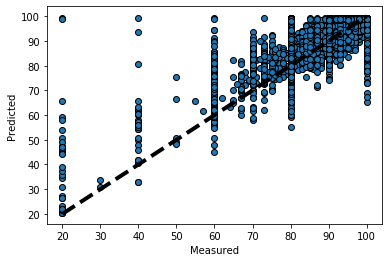

In [19]:
fig, ax = plt.subplots()
ax.scatter(y, predict, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

corr = df_imp.corr()

In [20]:
# Visualisoidaan ennusdtettujen ja todellisten valinen ero
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [21]:
df_visual = pd.DataFrame({'Measured':y, 'Predicted':predict})
df_visual.head()

,Measured,Predicted
0,82.0,84.501183
1,93.0,94.334359
2,93.0,89.915447
3,89.0,91.103342
4,99.0,99.172582


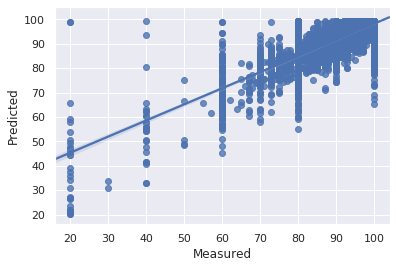

In [22]:
sns.regplot(x="Measured", y="Predicted", data=df_visual);

In [ ]:
# Katso video https://www.youtube.com/watch?v=hsfWtPH2kDg